In [3]:
# Since we don't have a separate exceptions module, define Empty here
class Empty(Exception):
    pass

# Assume that the LinkedQueue is in the same file
class LinkedQueue:
    """FIFO queue implementation using a singly linked list for storage."""
    class _Node:
        """Lightweight, nonpublic class for storing a singly linked node."""
        __slots__ = '_element', '_next'  # streamline memory usage

        def __init__(self, element, next):
            self._element = element
            self._next = next

    def __init__(self):
        """Create an empty queue."""
        self._head = None
        self._tail = None
        self._size = 0  # number of queue elements

    def __len__(self):
        """Return the number of elements in the queue."""
        return self._size

    def is_empty(self):
        """Return True if the queue is empty."""
        return self._size == 0

    def first(self):
        """Return (but do not remove) the element at the front of the queue.

        Raise Empty exception if the queue is empty.
        """
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._head._element  # front aligned with head of list

    def dequeue(self):
        """Remove and return the first element of the queue (i.e., FIFO).

        Raise Empty exception if the queue is empty.
        """
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        if self.is_empty():  # special case as queue is empty
            self._tail = None  # removed head had been the tail
        return answer

    def enqueue(self, e):
        """Add an element to the back of queue."""
        newest = self._Node(e, None)  # node will be new tail node
        if self.is_empty():
            self._head = newest  # special case: previously empty
        else:
            self._tail._next = newest
        self._tail = newest  # update reference to tail node
        self._size += 1

# Rest of the Tree code...
class Tree:
    """Abstract base class representing a tree structure."""
    class Position:
        def element(self):
            raise NotImplementedError('must be implemented by subclass')
      
        def __eq__(self, other):
            raise NotImplementedError('must be implemented by subclass')

        def __ne__(self, other):
            return not (self == other)  # opposite of __eq__

    def root(self):
        raise NotImplementedError('must be implemented by subclass')

    def parent(self, p):
        raise NotImplementedError('must be implemented by subclass')

    def num_children(self, p):
        raise NotImplementedError('must be implemented by subclass')

    def children(self, p):
        raise NotImplementedError('must be implemented by subclass')

    def __len__(self):
        raise NotImplementedError('must be implemented by subclass')

    def is_root(self, p):
        return self.root() == p

    def is_leaf(self, p):
        return self.num_children(p) == 0

    def is_empty(self):
        return len(self) == 0

    def depth(self, p):
        if self.is_root(p):
            return 0
        else:
            return 1 + self.depth(self.parent(p))

    def _height1(self):
        return max(self.depth(p) for p in self.positions() if self.is_leaf(p))

    def _height2(self, p):
        if self.is_leaf(p):
            return 0
        else:
            return 1 + max(self._height2(c) for c in self.children(p))

    def height(self, p=None):
        if p is None:
            p = self.root()
        return self._height2(p) 

    def __iter__(self):
        for p in self.positions():
            yield p.element()                               

    def positions(self):
        return self.preorder()                            

    def preorder(self):
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):  
                yield p

    def _subtree_preorder(self, p):
        yield p                                           
        for c in self.children(p):                        
            for other in self._subtree_preorder(c):       
                yield other                                

    def postorder(self):
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):  
                yield p

    def _subtree_postorder(self, p):
        for c in self.children(p):                        
            for other in self._subtree_postorder(c):      
                yield other                                
        yield p                                           

    def breadthfirst(self):
        if not self.is_empty():
            fringe = LinkedQueue()             
            fringe.enqueue(self.root())        
            while not fringe.is_empty():
                p = fringe.dequeue()             
                yield p                          
                for c in self.children(p):
                    fringe.enqueue(c)             



In [4]:
class SimpleBinaryTree(Tree):
    """A basic binary tree implementation."""

    class _Node:
        """Non-public class for storing a node."""
        __slots__ = '_element', '_parent', '_left', '_right'

        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right

    class Position(Tree.Position):
        """An abstraction representing the location of a single element."""

        def __init__(self, container, node):
            self._container = container
            self._node = node

        def element(self):
            return self._node._element

        def __eq__(self, other):
            return type(other) is type(self) and other._node is self._node

    def _validate(self, p):
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._parent is p._node:      # convention for deprecated nodes
            raise ValueError('p is no longer valid')
        return p._node

    def _make_position(self, node):
        return self.Position(self, node) if node is not None else None

    def __init__(self):
        """Create an initially empty binary tree."""
        self._root = None
        self._size = 0

    def __len__(self):
        """Return the total number of elements in the tree."""
        return self._size

    def root(self):
        """Return the root Position of the tree (or None if tree is empty)."""
        return self._make_position(self._root)

    def parent(self, p):
        """Return the Position of p's parent (or None if p is root)."""
        node = self._validate(p)
        return self._make_position(node._parent)

    def left(self, p):
        """Return the Position of p's left child (or None if no left child)."""
        node = self._validate(p)
        return self._make_position(node._left)

    def right(self, p):
        """Return the Position of p's right child (or None if no right child)."""
        node = self._validate(p)
        return self._make_position(node._right)

    def num_children(self, p):
        """Return the number of children of Position p."""
        node = self._validate(p)
        count = 0
        if node._left is not None:     # left child exists
            count += 1
        if node._right is not None:    # right child exists
            count += 1
        return count

    def _add_root(self, e):
        """Place element e at the root of an empty tree and return new Position.

        Raise ValueError if tree nonempty.
        """
        if self._root is not None:
            raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)

    def _add_left(self, p, e):
        """Create a new left child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a left child.
        """
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('Left child exists')
        self._size += 1
        node._left = self._Node(e, node)  # node is its parent
        return self._make_position(node._left)

    def _add_right(self, p, e):
        """Create a new right child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a right child.
        """
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Right child exists')
        self._size += 1
        node._right = self._Node(e, node)  # node is its parent
        return self._make_position(node._right)

    def children(self, p):
        """Generate an iteration of Positions representing p's children."""
        node = self._validate(p)
        if node._left is not None:
            yield self._make_position(node._left)
        if node._right is not None:
            yield self._make_position(node._right)


Creating a balanced binary tree with 4 levels, 8 leaf nodes, and 7 internal nodes...


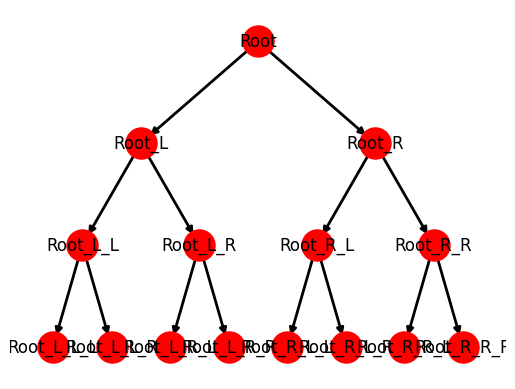

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def add_edges(G, parent_node, level, max_level):
    if level == max_level:
        return
    left_node = f'{parent_node}_L'
    right_node = f'{parent_node}_R'
    G.add_edge(parent_node, left_node)
    G.add_edge(parent_node, right_node)
    add_edges(G, left_node, level + 1, max_level)
    add_edges(G, right_node, level + 1, max_level)

# Ask user for the number of levels
levels = int(input("Enter the number of levels for the tree: "))
leaf_nodes = 2**(levels-1)
internal_nodes = 2**(levels-1) - 1

print(f"Creating a balanced binary tree with {levels} levels, {leaf_nodes} leaf nodes, and {internal_nodes} internal nodes...")

G = nx.DiGraph()
root_node = 'Root'
G.add_node(root_node)

# Adding edges recursively
add_edges(G, root_node, 1, levels)

# Positions for all nodes
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = []):
    if pos is None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
    if len(children)!=0:
        dx = width/len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, parent = root, parsed=parsed)
    return pos

pos = hierarchy_pos(G, root_node)


# Nodes
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=500)

# Edges
nx.draw_networkx_edges(G, pos, width=2)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.show()


In [16]:
# We can perform a depth-first traversal using networkx's built-in depth-first search function
print("Depth-first traversal: ")
for node in nx.dfs_preorder_nodes(G, root_node):
    print(node)
    # Pause for effect
    time.sleep(1)

# Similarly, we can perform a breadth-first traversal using networkx's built-in breadth-first search function
print("\nBreadth-first traversal: ")
for node in nx.bfs_tree(G, root_node):
    print(node)
    # Pause for effect
    time.sleep(1)


Depth-first traversal: 
Root
Root_L
Root_L_L
Root_L_L_L
Root_L_L_R
Root_L_R
Root_L_R_L
Root_L_R_R
Root_R
Root_R_L
Root_R_L_L
Root_R_L_R
Root_R_R
Root_R_R_L
Root_R_R_R

Breadth-first traversal: 
Root
Root_L
Root_R
Root_L_L
Root_L_R
Root_R_L
Root_R_R
Root_L_L_L
Root_L_L_R
Root_L_R_L
Root_L_R_R
Root_R_L_L
Root_R_L_R
Root_R_R_L
Root_R_R_R
